# Problem 1 (Python)

---

### Questions

1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv
2. Create a contingency table of workclass and sex, and plot it.
3. Create a contingency table of sex and marital status, and plot it.
4. Create a new data frame, adultOver40, for those whose age > 40.
5. Recreate the contingency table of sex and marital status for adultOver40.
6. Determine whether any outliers exist for the education field.
7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?
8. Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.
9. Summarize your findings.

Summarization and overall explanation located at the end of the notebook.

---

In [70]:
# 1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csvLinks to an external site.

# Reading the data file

import pandas as pd

adult_training = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [71]:
# 1. Displaying the table

adult_training

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [72]:
# 2. Create a contingency table of workclass and sex.

# sex will be columns

workclass_sex = pd.crosstab(adult_training['workclass'], adult_training['sex'], margins = True)

workclass_sex

sex,Female,Male,All
workclass,,,
?,377,452,829
Federal-gov,149,305,454
Local-gov,377,592,969
Never-worked,1,4,5
Private,3574,6707,10281
Self-emp-inc,54,444,498
Self-emp-not-inc,178,992,1170
State-gov,201,385,586
Without-pay,1,4,5


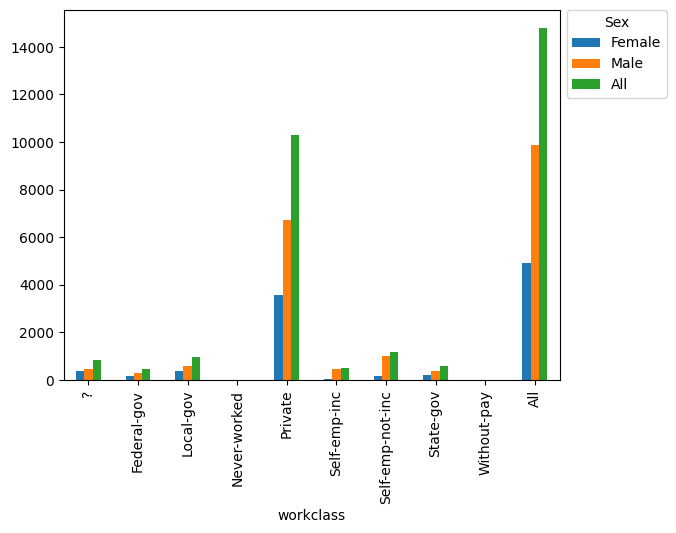

In [73]:
# 2. Plotting the crosstab between workclass and sex

import matplotlib.pyplot as plt

ax = workclass_sex.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

In [74]:
# 3. Create a contingency table of sex and marital status

# sex will be columns

marital_sex = pd.crosstab(adult_training['marital-status'], adult_training['sex'], margins = True)

marital_sex

sex,Female,Male,All
marital-status,,,
Divorced,1219,795,2014
Married-AF-spouse,7,4,11
Married-civ-spouse,761,6010,6771
Married-spouse-absent,95,104,199
Never-married,2160,2717,4877
Separated,290,182,472
Widowed,380,73,453
All,4912,9885,14797


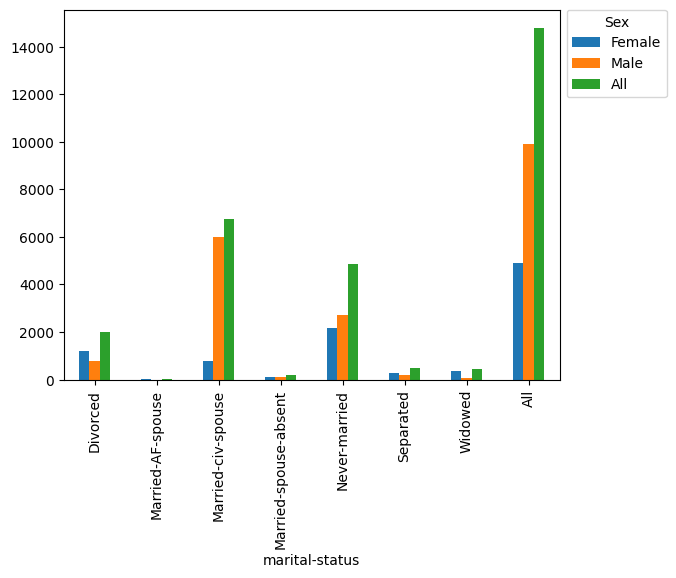

In [75]:
# 3. Plotting the crosstab between sex and marital status

import matplotlib.pyplot as plt

ax = marital_sex.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

In [76]:
# 4. Create a new data frame, adultOver40, for those whose age > 40.

adultOver40 = adult_training[adult_training['age'] > 40]

adultOver40

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


In [77]:
# 5. Recreate the contingency table of sex and marital status for adultOver40.

# sex will be columns

marital_sex_Over40 = pd.crosstab(adultOver40['marital-status'], adultOver40['sex'], margins = True)

marital_sex_Over40

sex,Female,Male,All
marital-status,,,
Divorced,720,448,1168
Married-civ-spouse,305,3383,3688
Married-spouse-absent,38,47,85
Never-married,256,315,571
Separated,133,74,207
Widowed,354,71,425
All,1806,4338,6144


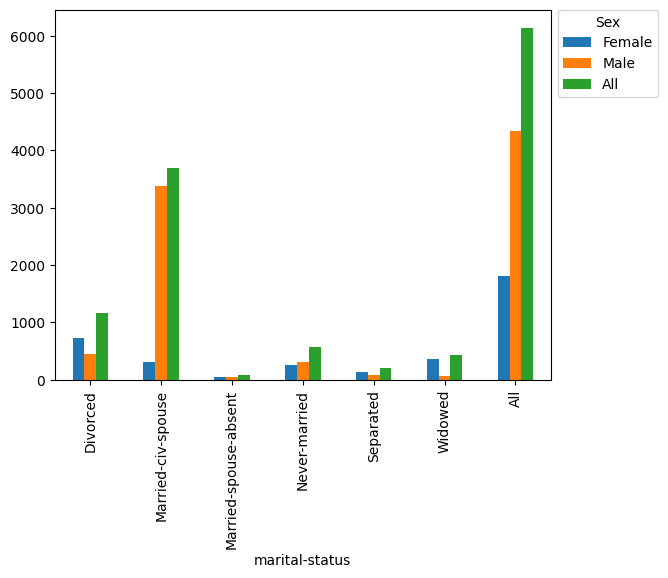

In [78]:
# 5. Plotting the crosstab between sex and marital status for adults over 40

import matplotlib.pyplot as plt

ax = marital_sex_Over40.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

In [79]:
# 6. Determine whether any outliers exist for the education field.

# Compute the basis stats for education
adult_training['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

In [80]:
# 6. Determine whether any outliers exist for the education field.

from scipy import stats
import matplotlib.pyplot as plt

# Standardize the values
adult_training['scaled_education'] = stats.zscore(adult_training.education, nan_policy='omit')

# Compute the basis stats for scaled_education
adult_training['scaled_education'].describe()

count    1.479700e+04
mean    -1.920775e-17
std      1.000034e+00
min     -3.490403e+00
25%     -4.113594e-01
50%     -2.647890e-02
75%      7.432821e-01
max      2.282804e+00
Name: scaled_education, dtype: float64

In [88]:
# 6. Find the number of outliers in scaled education.
# If no outliers exist, there are no outliers.
# If the result is anythinggreater than 0, then outliers do exist.

scaled_education_outliers = (adult_training['scaled_education'] > 3) | (adult_training['scaled_education'] < -3)

print("The number of outliers in scaled_age is", sum(scaled_education_outliers))

The number of outliers in scaled_age is 113


In [82]:
# 7. Standardize (zero mean) the age variable.

from scipy import stats

adult_training['scaled_age'] = stats.zscore(adult_training.age, nan_policy='omit')

adult_training['scaled_age'].describe()

count    1.479700e+04
mean     9.651895e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64

In [87]:
# 7. Identify how many outliers there are in scaled_age.

scaled_age_outliers = (adult_training['scaled_age'] > 3) | (adult_training['scaled_age'] < -3)

print("The number of outliers in scaled_age is", sum(scaled_age_outliers))

The number of outliers in scaled_age is 60


In [84]:
# 7. What is the most extreme outlier?

# The max value for the scaled variable is greater than 3.
# The min value for the scaled variable is less than -3.
# Therefore, the most extreme outlier is the max value for age.

print("The most extreme outlier for scaled_age is" , max(adult_training['scaled_age']), "\n")
print("The most extreme outlier for age is" , max(adult_training['age']))

The most extreme outlier for scaled_age is 3.7513537300721516 

The most extreme outlier for age is 90


<Axes: >

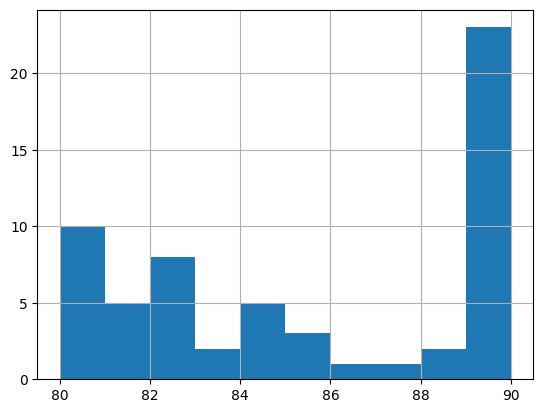

In [85]:
# 8. Select only records with age at least 80, and construct a histogram of age.

adult_80_Or_Over = adult_training[adult_training['age'] >= 80]

# Display histogram
adult_80_Or_Over['age'].hist()

---
## 9. Summarize your findings.
---
1. I created the table using the url and displayed it.
2. I created the crosstab of the workclass and sex variables. I used workclass for the rows and sex for the columns. I plotted the table with a bar graph. Private was the biggest workclass for both males and females.
3. I created the crosstab of the sex and marital-status variables. I used marital-status for the rows and sex for the columns. I plotted the table with a bar graph. Married-civ-spouse was the highest marital-status for males, and Never-married was the highest marital-status for females. Married-civ-spouse was the highest marital-status for all partcipants.
4. I created a new data frame for adults with an age of 40 or above and displayed it.
5. I created the crosstab for sex and marital-status variables for adults with an age of 40 or over. I used marital-status for the rows and sex for the columns. I plotted the table with a bar graph. Married-civ-spouse was still the highest marital-status for males 40 or above. Divorced was now the highest marital-status for females 40 or above. Married-civ-spouse was still the highest marital-status for all participants 40 or over.
6. I first computed the basic stats for the education field. I then standardized the educatio field using scipy.stats.zscore function. To find out if any outliers existed, I found the number of outliers within the scaled_education variable. If the number was equal to 0, then there were no outliers. If the number was greater than 0, then outliers did exist. There were 113 outliers found. Therefore, outliers did exist within the education field.
7. I standardized the age variable using the scipy.stats.zscore function and displayed the basis stats for the scaled_age variable. I then counted the number of outliers in the field using the three-sigma-rule. I found that 60 outliers existed. Looking at the basic stats for the scaled_age variable, I noticed that the min value (-1.59) was greater than -3, and the max value (3.75) was greater than 3. I used this information to confirm that the max value was the most extreme outlier within the field since it was 3 standard deviations above the mean and the min value also did not exceed 3 standard deviations below the mean. Therefore, the most extreme outlier in the scaled_age field was 3.75, and the most extreme outlier in the age field was 90.
8. I made a new data frame for adults greater than or equal to the age of 80. I then selected the age column and made a histogram out of it using the hist() function. It appears that there is a large number of people at the age of 90 and there is no one older than that. This could be an anomoly in the data since people can go above the age of 90. This shows that the age was perhaps capped at 90 when collecting the data, or there may have been an error that did not include data from people older than 90.
---